
개요
2022년 6월 국가통계포털에 따르면 외식 품목 중 자장면의 소비자 물가가 10.4% 오른 것으로 나타났다.
이런 추세에 따라 2040년 자장면 가각을 예측한다.
양파가격, 돼지고기가격, 밀가루가격을 특징으로 사용하고, 가격을 타겟으로 설정한다.
자장면 가격을 예측하는 문제는 종속변수인 가격이 수치형이기 때문에 선형회귀 모델을 사용한다.
데이터 수집
국가통계포털(https://kosis.kr)에서 품목별 소비자물가지수 검색
품목별 소비자물가지수(품목성질별:2020=100) 선택
품목별 소비자물가지수(품목성질별:2020=100) 탭 선택 후 다운로드
조회설정에서 연도별 csv 선택
자장면 가격 데이터
다운로드한 자료는 품목별 소비자물가지수 이기 때문에 연도별 자장면 재료 데이터가 필요하다.
이를 위해 물가지수 가준(100)이 되는 2020년 자장면 재료의 가격 데이터를 수집한다.
www.price.go.kr에 접속하여 외식비 페이지에서 2020년 자장면 가격 데이터를 구한다.
https://www.price.go.kr/tprice/portal/pricetrend/dineoutpricetrend/geDineOutYList.do
밀가루 가격은 가공식품-곡물가공품-밀가루 선택
돼지고기 가격은 www.ekapepia.com 소비자가격-기간별가격-연도별가격, 조회기간과 축종, 부위/규격(목심) 선택
2020년 양파가격은 1.5kg 당 3734, 돼지고기 가격은 100g 당 2032, 밀가루 가격은 kg 당 1356, 자장면 가격은 5195
소비자물가지수 -> 실제 가격으로
2020년 자장면 가격 = (2020년 자장면 평균가격 * 2020년 자장면 소비자 물가지수) / 100
2021년 자장면 가격 = (2020년 자장면 평균가격 * 2021년 자장면 소비자 물가지수) / 100

In [4]:
# 데이터 로드
import pandas as pd

# cp949는 한국어 텍스트 파일을 읽기 위한 문자 인코딩이다.
df = pd.read_csv("data.csv", encoding="cp949")
df.head()


,년도,양파,돼지고기,밀가루,자장면
0,1975,6.079,8.361,9.754,2.894
1,1976,7.141,10.893,10.368,3.193
2,1977,5.421,11.235,10.145,4.078
3,1978,11.372,15.103,9.961,4.277
4,1979,11.324,14.592,10.503,5.823


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   년도      50 non-null     int64  
 1   양파      50 non-null     float64
 2   돼지고기    50 non-null     float64
 3   밀가루     50 non-null     float64
 4   자장면     50 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.1 KB


In [6]:
df.isnull().sum()

년도      0
양파      0
돼지고기    0
밀가루     0
자장면     0
dtype: int64

In [8]:
# 가격별 소비자 물가지수 데이터를 가격 데이터로 변환 전처리 
price2020 = [3734, 2082, 1355, 5195]

df['양파 가격'] = round(df["양파"] * price2020[0] / 100,2)
df["돼지고기 가격"] = round(df["돼지고기"] * price2020[1] / 100, 2)
df["밀가루 가격"] = round(df["밀가루"] * price2020[2] / 100, 2)
df["자장면 가격"] = round(df["자장면"] * price2020[3] / 100, 2)

df[41:48]

,년도,양파,돼지고기,밀가루,자장면,양파 가격,돼지고기 가격,밀가루 가격,자장면 가격
41,2016,93.144,91.841,99.484,88.108,3478.00,1912.13,1348.01,4577.21
42,2017,100.359,97.522,98.352,90.933,3747.41,2030.41,1332.67,4723.97
43,2018,80.856,93.981,99.398,94.982,3019.16,1956.68,1346.84,4934.31
44,2019,68.748,90.311,101.074,98.589,2567.05,1880.28,1369.55,5121.70
45,2020,100.000,100.000,100.000,100.000,3734.00,2082.00,1355.00,5195.00
46,2021,103.560,111.110,100.670,103.070,3866.93,2313.31,1364.08,5354.49
47,2022,94.420,120.090,128.830,114.200,3525.64,2500.27,1745.65,5932.69


In [9]:
df2 = df.iloc[:,[0,5,6,7,8]]
df2.head()

,년도,양파 가격,돼지고기 가격,밀가루 가격,자장면 가격
0,1975,226.99,174.08,132.17,150.34
1,1976,266.64,226.79,140.49,165.88
2,1977,202.42,233.91,137.46,211.85
3,1978,424.63,314.44,134.97,222.19
4,1979,422.84,303.81,142.32,302.50


In [12]:
# 한글 처리를 위한 라이브러리 설칠 
!pip install koreanize-matplotlib

   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   -------------------------------- ------- 6.6/7.9 MB 40.1 MB/s eta 0:00:01
   ---------------------------------------- 7.9/7.9 MB 25.9 MB/s eta 0:00:00


In [13]:
# 각 요소별 관계 수치 
df2.corr()

# 자장면 가격은 연도와 상관관계가 0.98로 가장 높고, 다음으로 밀가루 순이다. 

,년도,양파 가격,돼지고기 가격,밀가루 가격,자장면 가격
년도,1.000000,0.952001,0.960596,0.953717,0.989907
양파 가격,0.952001,1.000000,0.945140,0.938066,0.954413
돼지고기 가격,0.960596,0.945140,1.000000,0.973867,0.970882
밀가루 가격,0.953717,0.938066,0.973867,1.000000,0.971659
자장면 가격,0.989907,0.954413,0.970882,0.971659,1.000000


<Axes: >

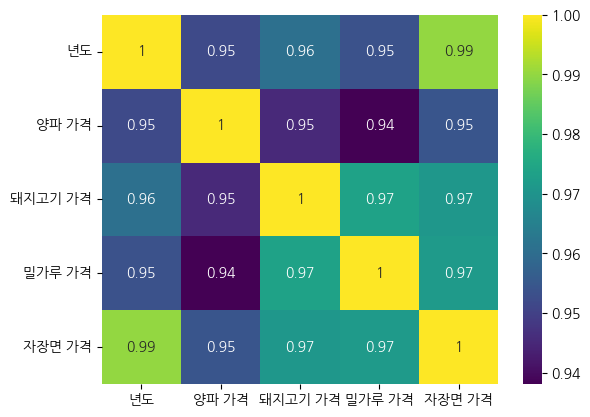

In [14]:
# 히트맵 시각화 

import koreanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df2.corr(), annot=True,cmap="viridis")

In [17]:
# 입력 데이터와 타겟 데이터 저장 
# 입력 데이터: X 
# 타겟 데이터: y

X = df2.iloc[:,:4]
y = df2.iloc[:,4]

print(X.shape, y.shape)

(50, 4) (50,)


In [18]:
# 훈련 세트와 테스트 세트 분할 
from sklearn.model_selection import  train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape,X_test.shape, y_train.shape,y_test.shape)

(35, 4) (15, 4) (35,) (15,)


In [19]:
# 선형 회귀 모델 학습 
from sklearn.linear_model import  LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [20]:
# 모델의 회귀 계수와 절편 확인 
print(model.coef_, model.intercept_)

# y = ax + bx + cx + d : a,b,c 가 계수, d 가 절편 

[ 9.33689969e+01 -7.79344808e-02  1.62256091e-01  8.73328944e-01] -184712.3112131269


In [21]:
# 모델 성능 확인 
print('훈련 데이터 학습 성능:', model.score(X_train, y_train))

훈련 데이터 학습 성능: 0.9883840700837054


In [22]:
# 테스트 세트를 이용한 모델 예측 
y_pred = model.predict(X_test)
print('실제가격', y_test[:5])
print('예측가격', y_pred[:5])

실제가격 13     824.86
39    4332.47
30    3172.38
45    5195.00
17    1596.27
Name: 자장면 가격, dtype: float64
예측가격 [1164.05790307 4641.96668591 3263.85928684 5123.23297968 1633.07819884]


In [25]:
# 미래 재료 가격
# 모델의 활용
columns = ["년도", "양파 가격", "돼지고기 가격", "밀가루 가격"]


# 초기 데이터 생성
df_new = pd.DataFrame(columns=columns)


# 데이터 삽입
data = [
    [2030, 4176.51, 2371.04, 1752.46],
    [2040, 4972.20, 4794.36, 2085.39],
    [2050, 5737.62, 3217.69, 2418.36],
]


# 데이터프레임에 데이터 추가
for row in data:
    df_new.loc[len(df_new)] = row


# 결과 출력
print(df_new)


       년도    양파 가격  돼지고기 가격   밀가루 가격
0  2030.0  4176.51  2371.04  1752.46
1  2040.0  4972.20  4794.36  2085.39
2  2050.0  5737.62  3217.69  2418.36


In [26]:
print(model.predict(df_new))

[6416.44798384 7972.08210109 8881.08748696]
